In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
animes_df = pd.read_csv("./data/animes.csv")
animes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [41]:
animes_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [42]:
missing_values = animes_df.isnull().sum()
missing_percentage = (missing_values / len(animes_df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]

missing_data

,Missing Values,Percentage
synopsis,975,5.048936
episodes,706,3.655947
ranked,3212,16.633007
score,579,2.998291
img_url,180,0.932111


In [43]:
descriptive_stats = animes_df.describe()

descriptive_stats

,uid,episodes,members,popularity,ranked,score
count,19311.000000,18605.000000,1.931100e+04,19311.000000,16099.000000,18732.000000
mean,19358.904096,11.460414,3.472609e+04,7720.830304,6866.524194,6.436107
std,14271.446515,47.950386,1.121772e+05,4676.786104,4390.018768,1.007941
min,1.000000,1.000000,2.500000e+01,1.000000,1.000000,1.250000
25%,4833.500000,1.000000,3.880000e+02,3725.000000,2895.500000,5.770000
50%,18327.000000,2.000000,2.389000e+03,7539.000000,6963.000000,6.410000
75%,33896.500000,12.000000,1.450150e+04,11613.000000,10601.500000,7.150000
max,40960.000000,3057.000000,1.871043e+06,16338.000000,14675.000000,9.230000


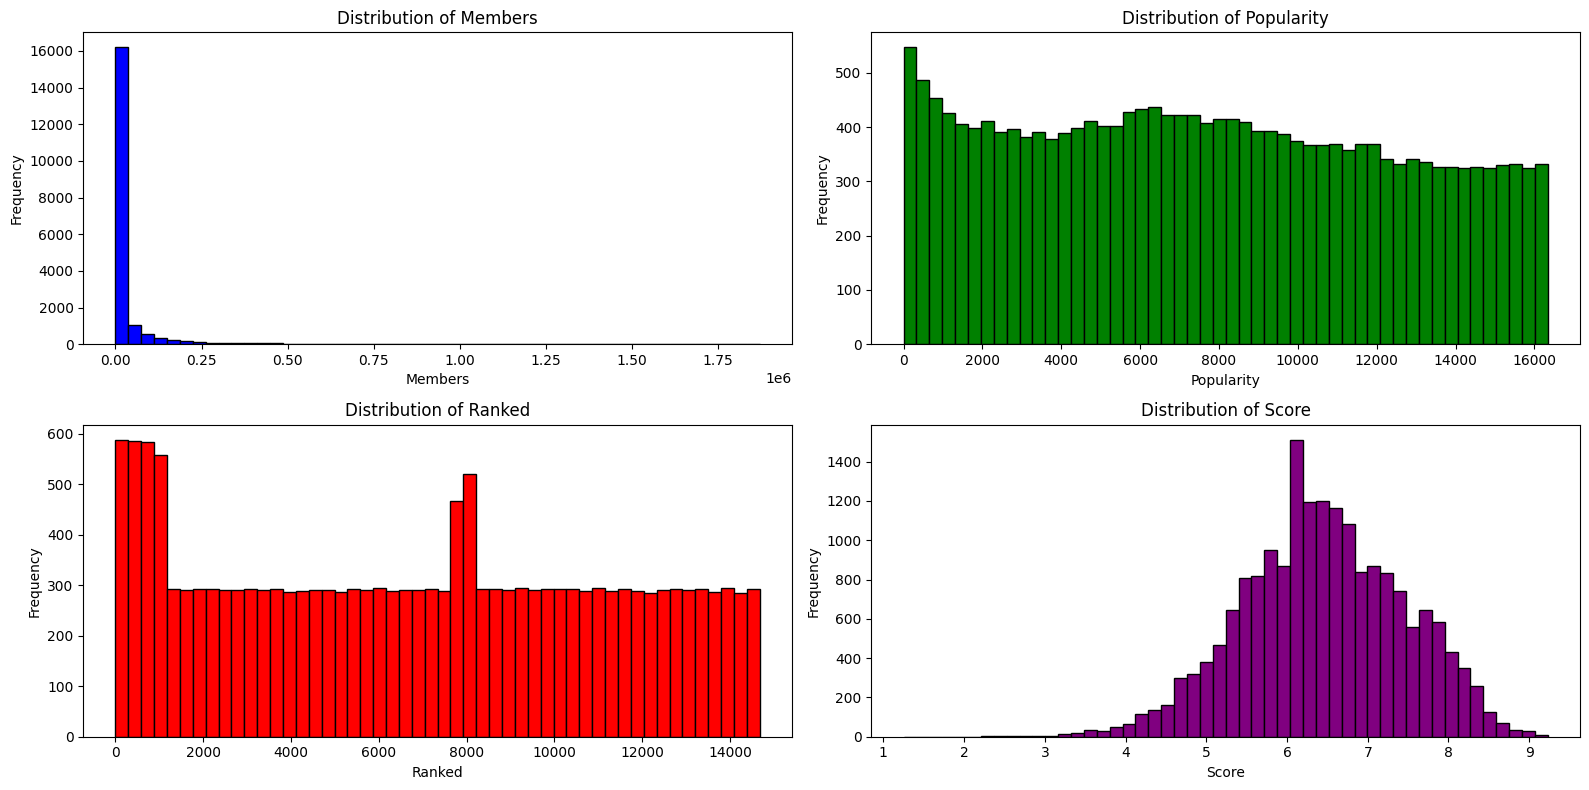

In [44]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.hist(animes_df['members'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Members')
plt.xlabel('Members')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(animes_df['popularity'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(animes_df['ranked'].dropna(), bins=50, color='red', edgecolor='black')
plt.title('Distribution of Ranked')
plt.xlabel('Ranked')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(animes_df['score'].dropna(), bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

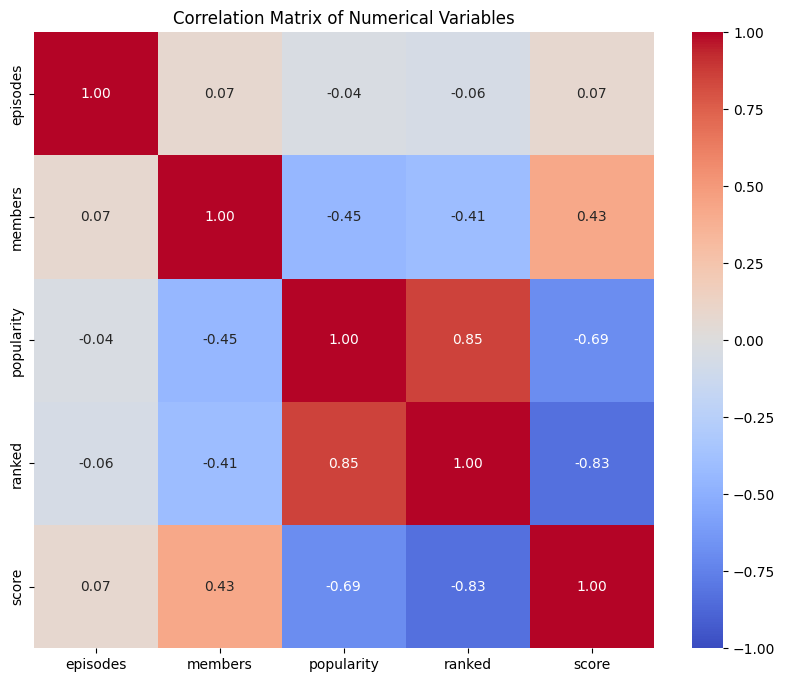

In [45]:
corr_matrix = animes_df[['episodes', 'members', 'popularity', 'ranked', 'score']].corr()

plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

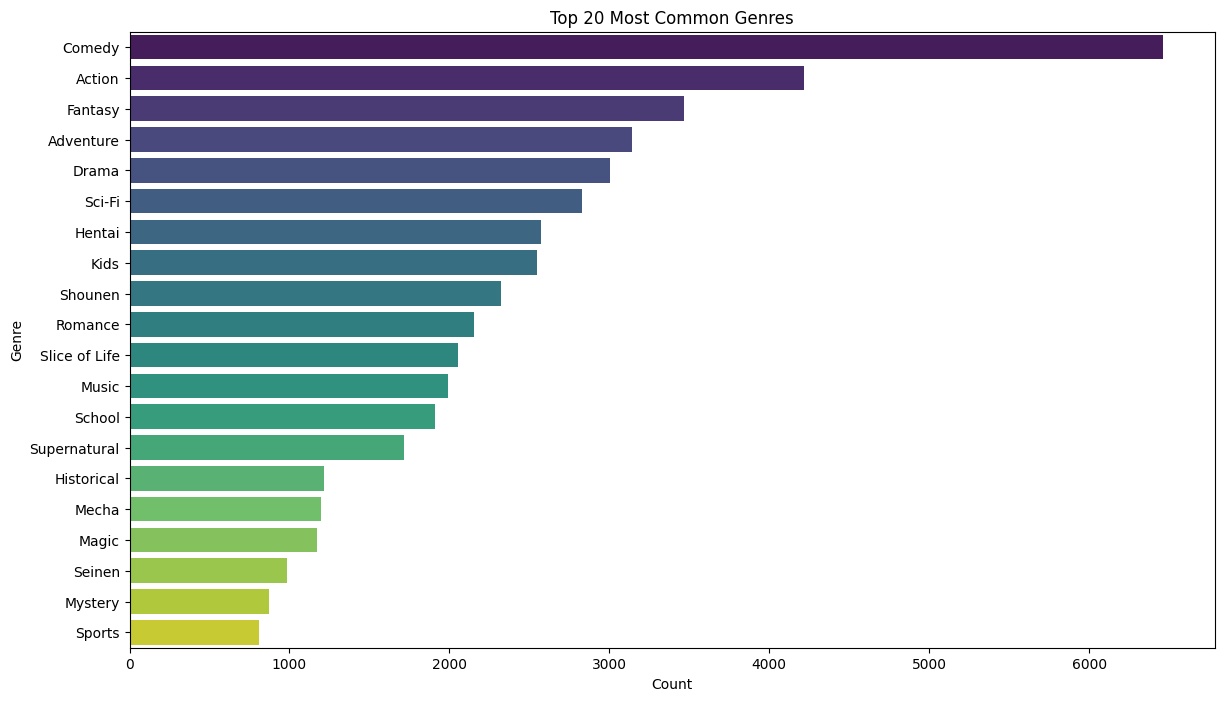

In [46]:
animes_df['genre'] = animes_df['genre'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
all_genres = [genre for sublist in animes_df['genre'] for genre in sublist]
genre_series = pd.Series(all_genres)

genre_counts = genre_series.value_counts()
top_genres = genre_counts.head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis', hue=top_genres.index, dodge=False)
plt.legend([],[], frameon=False)
plt.title('Top 20 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

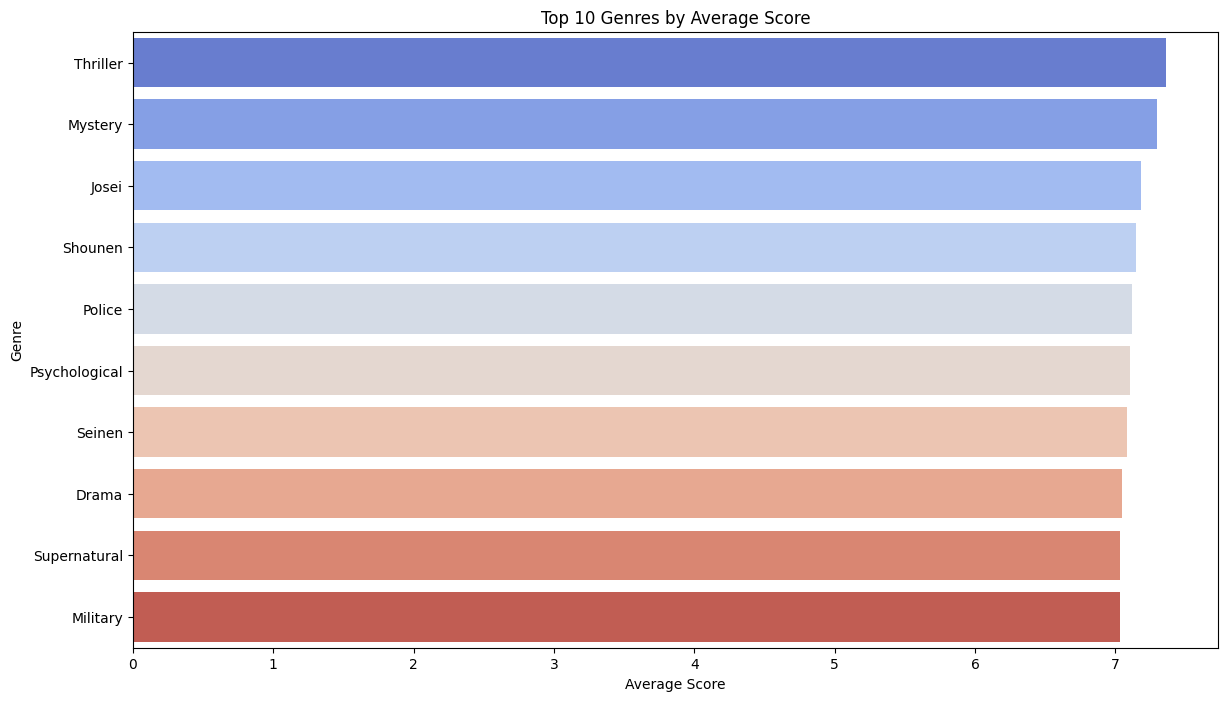

In [48]:
genre_score_popularity = animes_df.explode('genre').groupby('genre').agg({'score': 'mean', 'popularity': 'mean'}).sort_values(by='score', ascending=False)

top_genres_score = genre_score_popularity.head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_genres_score['score'], y=top_genres_score.index, palette='coolwarm', hue=top_genres_score.index, dodge=False)
plt.legend([],[], frameon=False)
plt.title('Top 10 Genres by Average Score')
plt.xlabel('Average Score')
plt.ylabel('Genre')
plt.show()

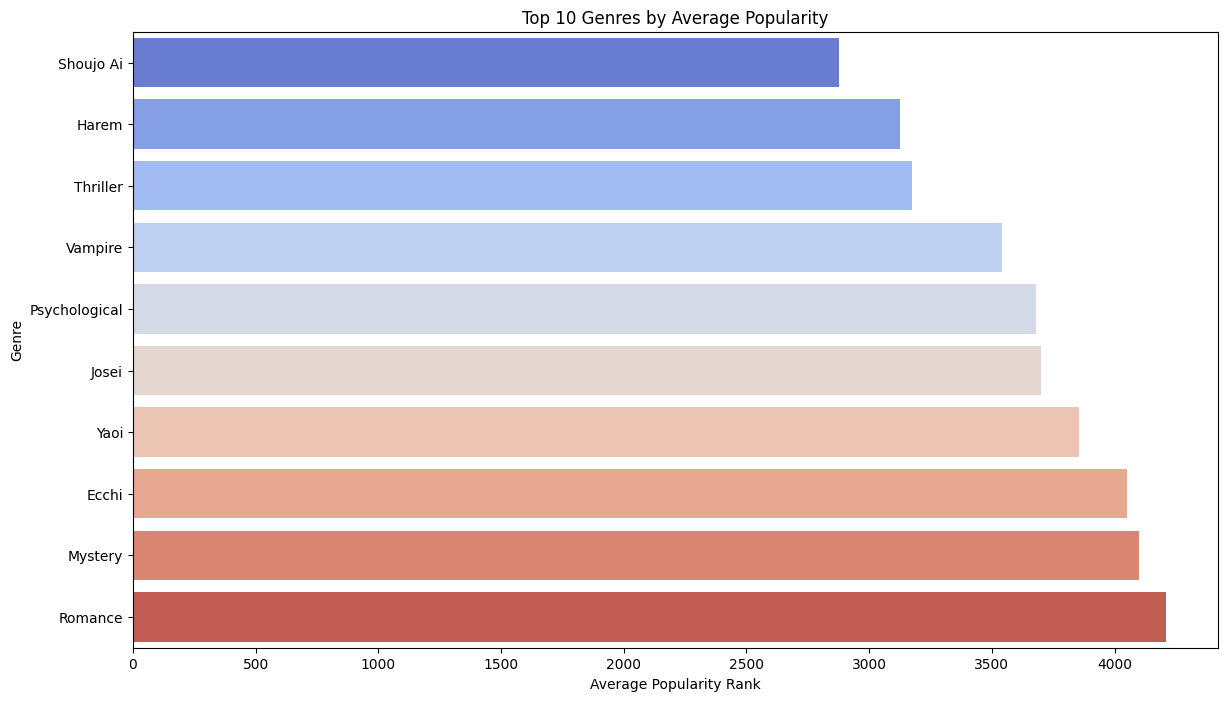

In [50]:
top_genres_popularity = genre_score_popularity.sort_values(by='popularity').head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_genres_popularity['popularity'], y=top_genres_popularity.index, palette='coolwarm', hue=top_genres_popularity.index, dodge=False)
plt.legend([],[], frameon=False)
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity Rank')
plt.ylabel('Genre')
plt.show()

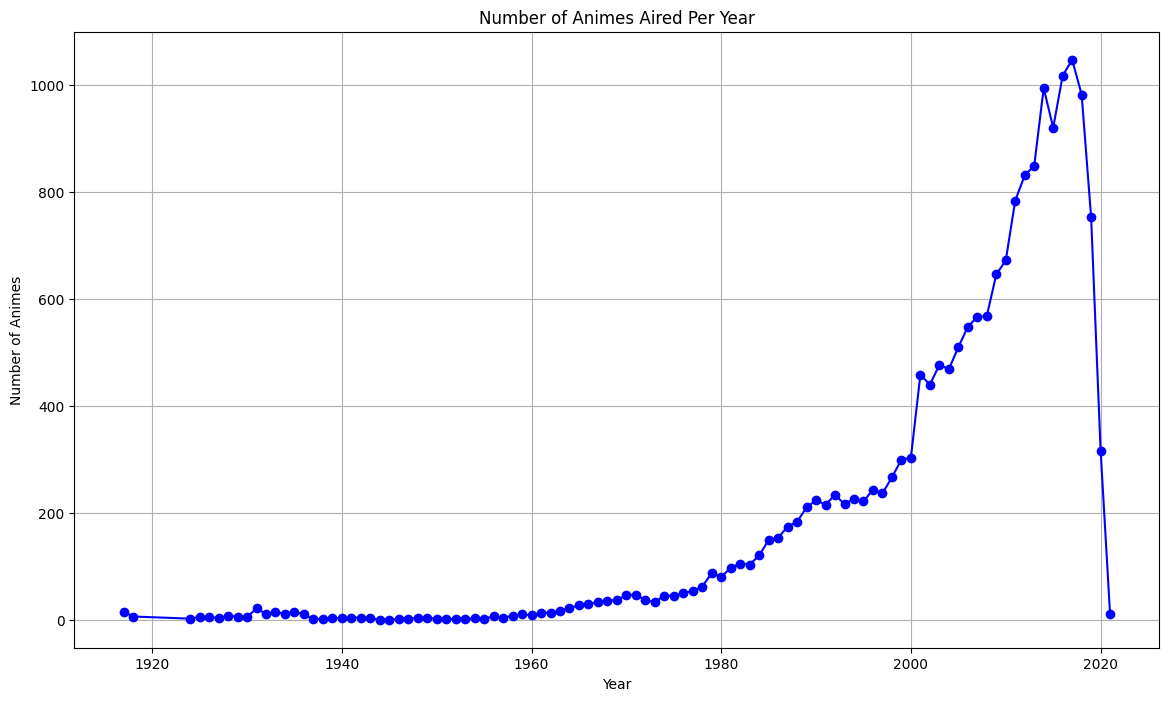

In [51]:
animes_df['year'] = animes_df['aired'].str.extract(r'(\d{4})').dropna().astype(int)

animes_per_year = animes_df['year'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
plt.plot(animes_per_year.index, animes_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of Animes Aired Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Animes')
plt.grid(True)
plt.show()